In [1]:
import xarray as xr
ds = xr.open_dataset('GPM_HailClimatology_BC2019_2deg.nc')

In [7]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 105.5 MB/s eta 0:00:00


In [8]:
ds

<xarray.Dataset> Size: 66kB
Dimensions:            (latitude: 90, longitude: 180)
Coordinates:
  * latitude           (latitude) float32 360B -89.0 -87.0 -85.0 ... 87.0 89.0
  * longitude          (longitude) float32 720B -179.0 -177.0 ... 177.0 179.0
Data variables:
    norm_hail_density  (latitude, longitude) float32 65kB ...

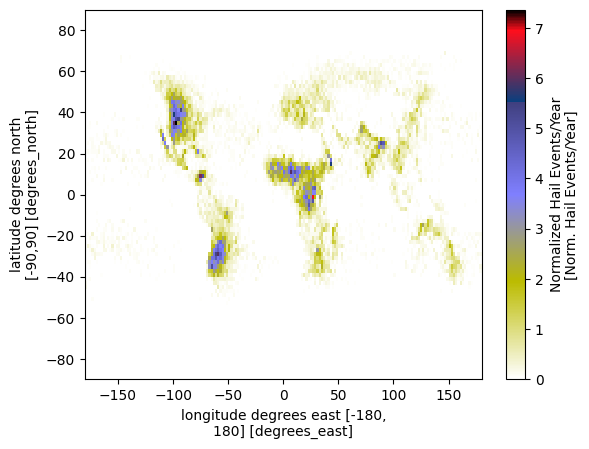

In [6]:
ds.norm_hail_density.plot(cmap='gist_stern_r')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


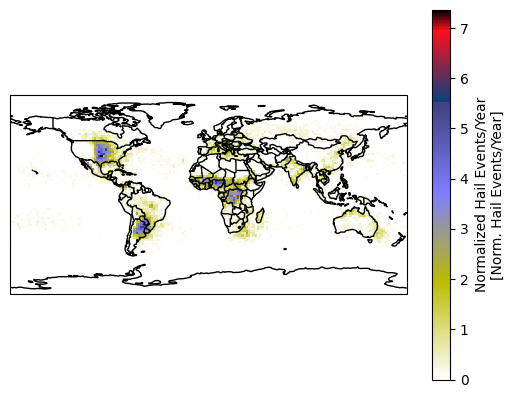

In [10]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create the plot
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ds.norm_hail_density.plot(ax=ax, cmap='gist_stern_r')

# Add country borders
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

# Optional: add coastlines or other features
ax.coastlines()

plt.show()


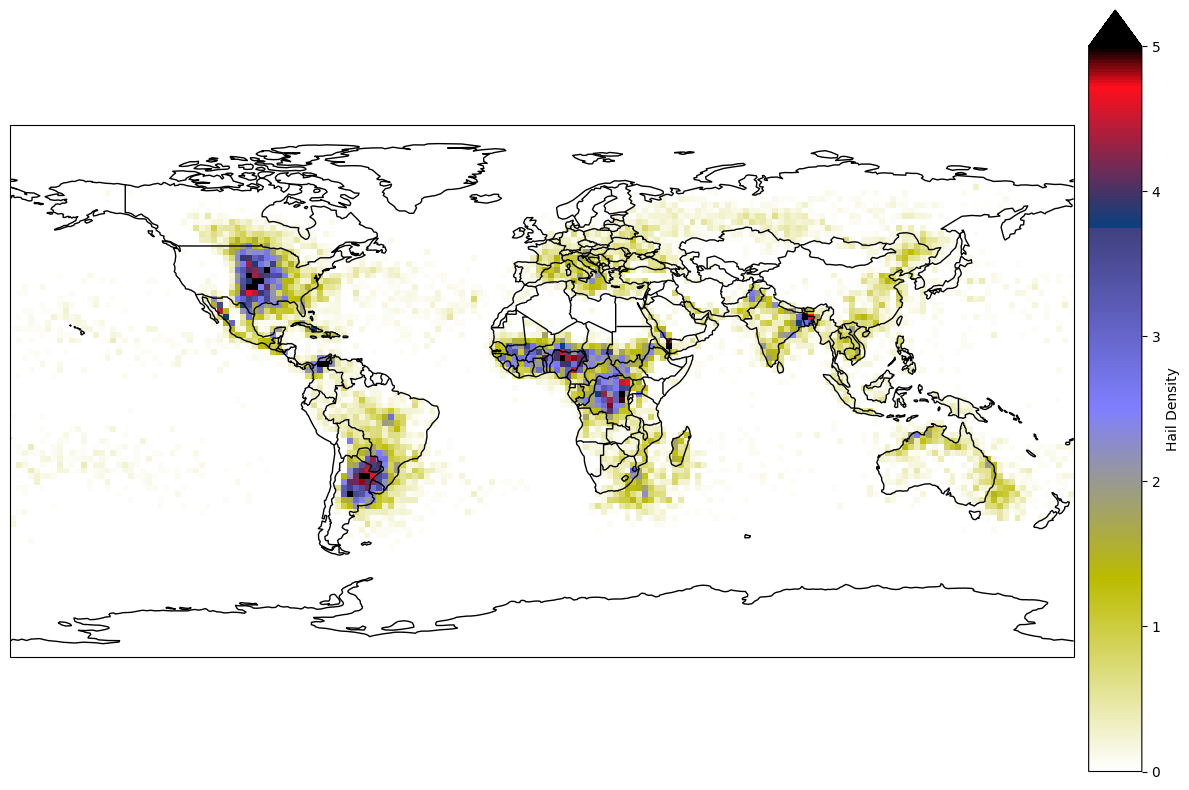

In [13]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec

# Create a figure with custom size
fig = plt.figure(figsize=(12, 8))  # Adjust width and height as needed
gs = gridspec.GridSpec(1, 2, width_ratios=[20, 1])  # Wider plot, narrow colorbar

# Create axes for plot and colorbar
ax = plt.subplot(gs[0], projection=ccrs.PlateCarree())
cax = plt.subplot(gs[1])  # Colorbar axis

# Plot data
plot = ds.norm_hail_density.plot(
    ax=ax,
    cmap='gist_stern_r',
    cbar_ax=cax,         # Use custom colorbar axis
    cbar_kwargs={'label': 'Hail Density'} , vmax=5 # Optional label, vmax=5
)

# Add features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.coastlines()

plt.tight_layout()
plt.show()

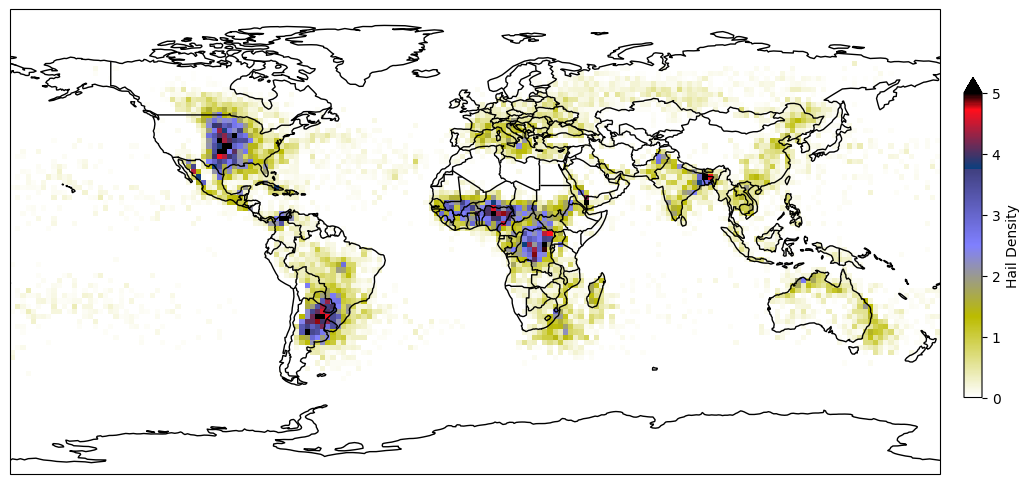

In [16]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure with custom size
fig = plt.figure(figsize=(12, 8))

# Create main plot axis
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the data
plot = ds.norm_hail_density.plot(
    ax=ax,
    cmap='gist_stern_r',
    add_colorbar=False,   # Disable default colorbar
    vmax=5
)

# Add custom, smaller colorbar axis
# [left, bottom, width, height] in figure coordinates (0-1)
cax = fig.add_axes([0.92, 0.3, 0.015, 0.4])  # Narrow, shorter colorbar
cbar = plt.colorbar(plot, cax=cax, extend='max')
cbar.set_label('Hail Density')

# Add features
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax.coastlines()

plt.savefig('hail_frequency.png', dpi=500)